In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from PIL import Image 
%matplotlib inline

In [12]:
# read in a imgage using mpimg and returns an 3d rgb array in (0-255)
def image_resize(image):
    x=image.shape[1]
    y=image.shape[0]
    output=np.zeros((16,12,3), dtype='int')
    x_ds=float(x-1)/(12 - 1)
    y_ds=float(y-1)/(16 - 1)
    for k in range(0,3):
        for i in range(0,16):
            for j in range(0,12):
                x_low=math.floor(x_ds*j)
                x_high=math.ceil(x_ds*j)
                y_low=math.floor(y_ds*i)
                y_high=math.ceil(y_ds*i)
                
                fir_pix=image[y_low, x_low, k]
                sec_pix=image[y_low, x_high, k]
                thir_pix=image[y_high, x_low, k]
                four_pix=image[y_high, x_high, k]
                
                x_weight = (x_ds * j) - x_low
                y_weight = (y_ds * i) - y_low
                
                output[i,j,k]=fir_pix * (1 - x_weight) * (1 - y_weight) + sec_pix * x_weight * (1 - y_weight) + thir_pix * y_weight * (1 - x_weight) + four_pix * x_weight * y_weight
    return output

In [15]:
def rotate_image(image): # rotate 90 degrees
    x=image.shape[1]
    y=image.shape[0]
    output_image=np.zeros((x,y,3), dtype='int')
    output_image[:,:,0] = image[:,:,0].T
    output_image[:,:,0] = np.fliplr(output_image[:,:,0])  # transpose and flip can rotate 90 degree
    output_image[:,:,1] = image[:,:,1].T
    output_image[:,:,1] = np.fliplr(output_image[:,:,1])
    output_image[:,:,2] = image[:,:,2].T
    output_image[:,:,2] = np.fliplr(output_image[:,:,2])
    return output_image

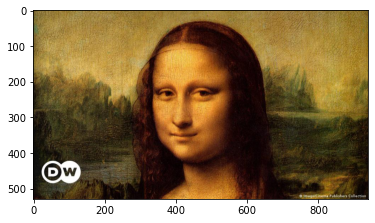

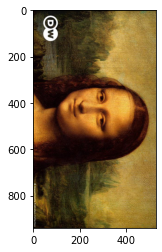

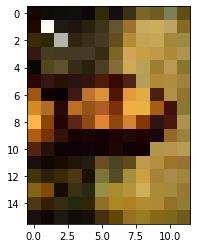

In [27]:
test_img = mpimg.imread('monalisa.jpeg') 
fig = plt.figure()
plt.imshow(test_img)

test_output=rotate_image(test_img)
#print(test_output)
fig=plt.figure()
plt.imshow(test_output)  #output image

test_output_2 = image_resize(test_output)
#print(test_output_2)
fig = plt.figure()
plt.imshow(test_output_2)

plt.savefig('test_output.png')  # save image